In [1]:
# Import all the stuff we will need
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from numpy.random import seed
seed(1)

2021-11-04 19:08:29.539180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sdysch/Documents/rootInstall/root/lib
2021-11-04 19:08:29.539197: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# generate some data, add to df
n = 10000

var_1 = -1 * np.log(np.random.rand(n))
var_2 = -2 * np.log(np.random.rand(n))
var_3 = -3 * np.log(np.random.rand(n))
var_4 = -4 * np.log(np.random.rand(n))

# scale to mean 0, std 1
var_1 = ( var_1 - np.mean(var_1) ) / np.std(var_1)
var_2 = ( var_2 - np.mean(var_2) ) / np.std(var_2)
var_3 = ( var_3 - np.mean(var_3) ) / np.std(var_3)
var_4 = ( var_4 - np.mean(var_4) ) / np.std(var_4)

data = pd.DataFrame({"x1" : var_1,
                     "x2" : var_2,
                     "x3" : var_3,
                     "x4" : var_4
                    })
#data

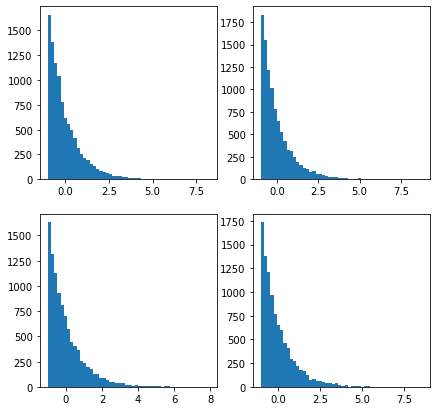

In [3]:
# draw vars
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
bins = 50
_ = axs[0, 0].hist(data.x1, bins = bins)
_ = axs[0, 1].hist(data.x2, bins = bins)
_ = axs[1, 0].hist(data.x3, bins = bins)
_ = axs[1, 1].hist(data.x4, bins = bins)

In [4]:
# split into training and testing data, 70% fraction
# will split test into validation during model training
split = int(0.7 * len(data))
train = data[0:split].values
test  = data[split:].values

In [5]:
# setup autoencoder, we will use a NN with 4 - 3 - 2 - 3 - 4 to encode and decode our data
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(4, activation='linear'))

model.summary()

learning_rate = 0.001 * 2
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 16        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


2021-11-04 19:08:31.292381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sdysch/Documents/rootInstall/root/lib
2021-11-04 19:08:31.292416: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-04 19:08:31.292438: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sdysch-Lenovo-IdeaPad-S540-15IML): /proc/driver/nvidia/version does not exist
2021-11-04 19:08:31.292684: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
epochs = 300

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=train, y=train, batch_size=10, epochs=epochs, validation_split=0.3, callbacks=[es])

2021-11-04 19:08:31.388881: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 19:08:31.406851: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099940000 Hz


Epoch 1/300
490/490 [==============================] - 1s 869us/step - loss: 0.6985 - mse: 0.6985 - val_loss: 0.5597 - val_mse: 0.5597
Epoch 2/300
490/490 [==============================] - 0s 694us/step - loss: 0.4748 - mse: 0.4748 - val_loss: 0.4312 - val_mse: 0.4312
Epoch 3/300
490/490 [==============================] - 0s 679us/step - loss: 0.3823 - mse: 0.3823 - val_loss: 0.3826 - val_mse: 0.3826
Epoch 4/300
490/490 [==============================] - 0s 679us/step - loss: 0.3530 - mse: 0.3530 - val_loss: 0.3698 - val_mse: 0.3698
Epoch 5/300
490/490 [==============================] - 0s 682us/step - loss: 0.3447 - mse: 0.3447 - val_loss: 0.3659 - val_mse: 0.3659
Epoch 6/300
490/490 [==============================] - 0s 690us/step - loss: 0.3418 - mse: 0.3418 - val_loss: 0.3660 - val_mse: 0.3660
Epoch 7/300
490/490 [==============================] - 0s 682us/step - loss: 0.3398 - mse: 0.3398 - val_loss: 0.3653 - val_mse: 0.3653
Epoch 8/300
490/490 [==============================] - 

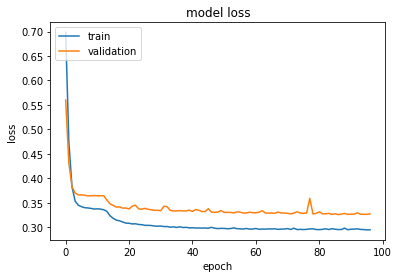

In [7]:
# learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.gca().set_yscale("log")
plt.show()

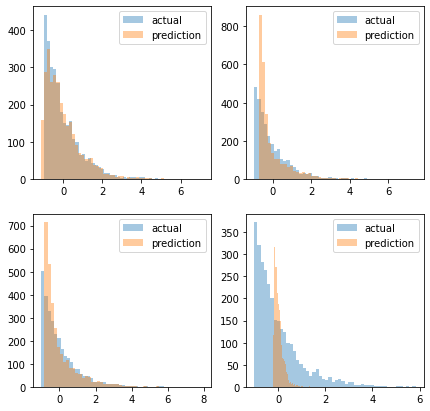

In [8]:
# predictions
pred = model.predict(test)

# draw vars
nbins = 50
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
_ = axs[0, 0].hist(test[:,0], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[0, 0].hist(pred[:,0], bins = nbins, alpha = 0.4, label = "prediction")
axs[0, 0].legend()

_ = axs[0, 1].hist(test[:,1], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[0, 1].hist(pred[:,1], bins = nbins, alpha = 0.4, label = "prediction")
axs[0, 1].legend()

_ = axs[1, 0].hist(test[:,2], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[1, 0].hist(pred[:,2], bins = nbins, alpha = 0.4, label = "prediction")
axs[1, 0].legend()

_ = axs[1, 1].hist(test[:,3], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[1, 1].hist(pred[:,3], bins = nbins, alpha = 0.4, label = "prediction")
axs[1, 1].legend()

In [9]:
# Let's add in an anomalous data point
anomaly = test
anomaly[0]

array([ 0.72675631, -0.65983973, -0.98984676, -1.00220301])

In [10]:
# arbitrary
scale = 10.
anomaly[0, 0] = anomaly[:, 0].mean() * scale
anomaly[0, 1] = anomaly[:, 1].mean() * scale
anomaly[0, 2] = anomaly[:, 2].mean() * scale
anomaly[0, 3] = anomaly[:, 3].mean() * scale
anomaly[0]

array([-0.03600638, -0.12637674,  0.03727298, -0.0026977 ])

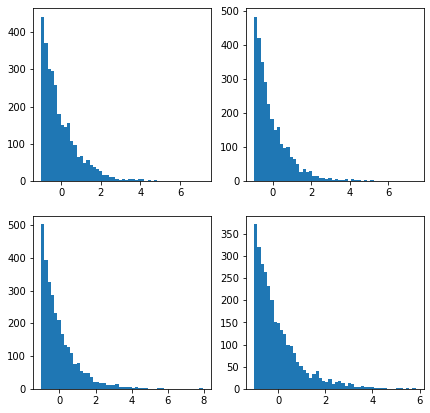

In [11]:
# draw vars with anomaly
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
bins = 50
_ = axs[0, 0].hist(anomaly[:,0], bins = bins)
_ = axs[0, 1].hist(anomaly[:,1], bins = bins)
_ = axs[1, 0].hist(anomaly[:,2], bins = bins)
_ = axs[1, 1].hist(anomaly[:,3], bins = bins)

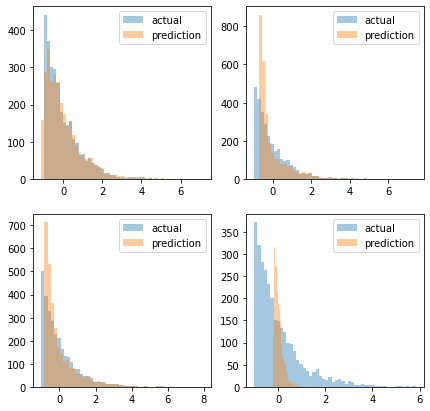

In [12]:
# predictions
pred_anomaly = model.predict(anomaly)

# draw vars
nbins = 50
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
_ = axs[0, 0].hist(anomaly[:,0], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[0, 0].hist(pred_anomaly[:,0], bins = nbins, alpha = 0.4, label = "prediction")
axs[0, 0].legend()

_ = axs[0, 1].hist(anomaly[:,1], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[0, 1].hist(pred_anomaly[:,1], bins = nbins, alpha = 0.4, label = "prediction")
axs[0, 1].legend()

_ = axs[1, 0].hist(anomaly[:,2], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[1, 0].hist(pred_anomaly[:,2], bins = nbins, alpha = 0.4, label = "prediction")
axs[1, 0].legend()

_ = axs[1, 1].hist(anomaly[:,3], bins = nbins, alpha = 0.4, label = "actual")
_ = axs[1, 1].hist(pred_anomaly[:,3], bins = nbins, alpha = 0.4, label = "prediction")
axs[1, 1].legend()

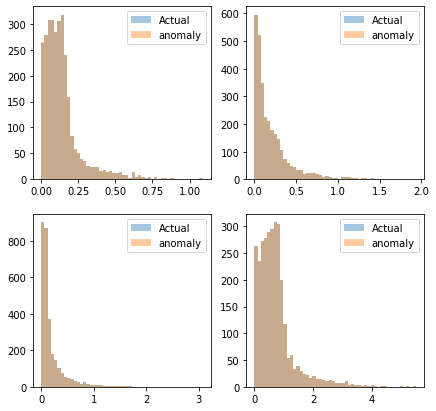

In [13]:
# to compare, draw errors
nbins = 50
error_pred = np.sqrt((pred - test) ** 2.)
error_anomaly = np.sqrt((pred_anomaly - anomaly) ** 2.)
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
_ = axs[0, 0].hist(error_pred[:,0], bins = nbins, alpha = 0.4, label = "Actual")
_ = axs[0, 1].hist(error_pred[:,1], bins = nbins, alpha = 0.4, label = "Actual")
_ = axs[1, 0].hist(error_pred[:,2], bins = nbins, alpha = 0.4, label = "Actual")
_ = axs[1, 1].hist(error_pred[:,3], bins = nbins, alpha = 0.4, label = "Actual")

_ = axs[0, 0].hist(error_anomaly[:,0], bins = nbins, alpha = 0.4, label = "anomaly")
_ = axs[0, 1].hist(error_anomaly[:,1], bins = nbins, alpha = 0.4, label = "anomaly")
_ = axs[1, 0].hist(error_anomaly[:,2], bins = nbins, alpha = 0.4, label = "anomaly")
_ = axs[1, 1].hist(error_anomaly[:,3], bins = nbins, alpha = 0.4, label = "anomaly")

axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

In [14]:
# difference in means?
for i in range(4):
    print(error_pred[:,i].mean(), error_anomaly[:,i].mean())

0.14167781362642912 0.14150014990280138
0.205427167563001 0.20537533341681927
0.19148265502337855 0.1912239146659758
0.7266256655853855 0.7265946939434347
